# Project: Wrangling and Analyze Data

## Table of Contents:
- **Imports**
- **Data Gathering**
- **Assessing Data**
- **Quality Issues**
- **Tidiness Issues**
- **Cleaning Data**
- **Storing Data**
- **Analyzing and Visualizing Data**

## Imports

In [1]:
# imports
%matplotlib inline
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import numpy as np
import matplotlib.pyplot as plt

## Data Gathering

**1. Directly downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)**

In [2]:
#importing twitter-archive-enhanced.csv into a DataFrame
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# checking to see if the file was imported correctly
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)**

In [4]:
# programmatically downloading the image_predictions file and writing it to a ".tsv" file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', mode = 'wb') as file :
    file.write(response.content)

In [5]:
# importing 'image_predictions.tsv' into a pandas DataFrame
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

In [6]:
# checking to see if the file was imported correctly
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)**

**NOTE TO REVIEWER :**
My Twitter developer account application (for this project use case) was not approved. Hence, I followed the directions (in the classroom) for accessing the Twitter data without actually having a Twitter developer account :
1. I have downloaded the "tweet_json.txt" file directly from the supporting material section provided in the classroom.
2. The next three (3) cells below were modified but copied from the __[Twitter API code](https://video.udacity-data.com/topher/2018/November/5be5fb4c_twitter-api/twitter-api.py)__ in the supporting materials section that was provided by the udacity instructor in the classroom.

In [7]:
# creating Twitter api object
# These are hidden to comply with Twitter's API terms and conditions

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [8]:
tweet_ids = twitter_archive_enhanced['tweet_id'].values
print(len(tweet_ids))

2356


In [ ]:
# Querying Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Saving each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id,tweet_mode = 'extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

**Reading the "tweet_json.txt" file line by line into a Pandas DataFrame with the tweet ID,favorite count, and retweet count.**

In [9]:
# creating a list of dictionaries to which data will be appended to
tweet_data_list = []
# trying to know how much time the code here takes to run
start = timer()

with open('tweet-json.txt') as tweet_json_file:
    for i, _ in enumerate(tweet_json_file):
        tweet_json_data = tweet_json_file.readline()
        tweet_json = json.loads(tweet_json_data)
        tweet_id = tweet_json['id']
        retweet_count = tweet_json['retweet_count']
        favorite_count = tweet_json['favorite_count']
        i+=1
        tweet_data_list.append({'tweet_id':int(tweet_id),
                               'retweet_count':int(retweet_count),
                               'favorite_count':int(favorite_count)})
        # converting the list of dictionaries to a Pandas DataFrame
        tweet_json = pd.DataFrame(tweet_data_list, columns = ['tweet_id','retweet_count','favorite_count'])
        
end = timer()
print('total_tweets =',i,', and total time taken is',(end - start),'seconds.')

total_tweets = 1177 , and total time taken is 1.5378295999998954 seconds.


In [10]:
# checking to see if the list of dictionaries was converted to a DataFrame correctly
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892177421306343426,6514,33819
1,891689557279858688,8964,42908
2,891087950875897856,3261,20562
3,890729181411237888,16716,56848
4,890240255349198849,7711,32467


## Assessing Data


In [11]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892177421306343426,6514,33819
1,891689557279858688,8964,42908
2,891087950875897856,3261,20562
3,890729181411237888,16716,56848
4,890240255349198849,7711,32467


In [14]:
twitter_archive_enhanced.shape

(2356, 17)

In [15]:
image_predictions.shape

(2075, 12)

In [16]:
tweet_json.shape

(1177, 3)

In [17]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
twitter_archive_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
16,888917238123831296,NaN,NaN,2017-07-23 00:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jim. He found a fren. Taught him how t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888917238...,12,10,Jim,None,None,None,None
1795,677314812125323265,NaN,NaN,2015-12-17 02:30:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Tassy &amp; Bee. Tassy is pretty chill, b...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/677314812...,10,10,Tassy,None,None,None,None
1997,672591271085670400,NaN,NaN,2015-12-04 01:40:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Lots of pups here. All are Judea Hazelnuts. Ex...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672591271...,8,10,None,None,None,None,None
493,813202720496779264,NaN,NaN,2016-12-26 02:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo who has concluded that Christma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813202720...,11,10,None,doggo,None,None,None
1887,674788554665512960,NaN,NaN,2015-12-10 03:11:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Maggie. She's a Western Septic Do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674788554...,9,10,Maggie,None,None,None,None


In [19]:
twitter_archive_enhanced.name.value_counts()['this']

1

In [20]:
twitter_archive_enhanced.name.value_counts()['unacceptable']

1

In [21]:
twitter_archive_enhanced.name.isnull().sum()

0

In [22]:
twitter_archive_enhanced.duplicated().sum()

0

In [23]:
twitter_archive_enhanced['tweet_id'].duplicated().sum()

0

In [24]:
image_predictions.duplicated().sum()

0

In [25]:
image_predictions['tweet_id'].duplicated().sum()

0

In [26]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
767,689275259254616065,https://pbs.twimg.com/media/CZDMMY0WEAAQYjQ.jpg,1,American_Staffordshire_terrier,0.215161,True,Chesapeake_Bay_retriever,0.079051,True,Doberman,0.070226,True
1007,709198395643068416,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True
360,672640509974827008,https://pbs.twimg.com/media/CVWy9v-VAAALSoE.jpg,1,Chesapeake_Bay_retriever,0.420155,True,Cardigan,0.266030,True,Labrador_retriever,0.042514,True
2034,883838122936631299,https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg,1,Doberman,0.610946,True,miniature_pinscher,0.299603,True,kelpie,0.063020,True
611,680115823365742593,https://pbs.twimg.com/media/CXBBurSWMAELewi.jpg,1,pug,0.999365,True,French_bulldog,0.000544,True,Boston_bull,0.000028,True


In [28]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1177 non-null   int64
 1   retweet_count   1177 non-null   int64
 2   favorite_count  1177 non-null   int64
dtypes: int64(3)
memory usage: 27.7 KB


In [29]:
tweet_json.duplicated().sum()

0

In [30]:
tweet_json['tweet_id'].duplicated().sum()

0

In [31]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,1.177000e+03,1177.000000,1177.000000
mean,7.426493e+17,3107.338997,7901.181818
std,6.851760e+16,5458.476288,11536.383916
min,6.660209e+17,2.000000,0.000000
25%,6.783968e+17,613.000000,1339.000000
50%,7.193678e+17,1460.000000,3553.000000
75%,7.992971e+17,3628.000000,9872.000000
max,8.921774e+17,79515.000000,131075.000000


## Quality issues

#### twitter_archive_enhanced table

1. Missing expanded_urls.

2. Some tweets are actually retweets, while some tweets do not have images at all in them.

3. Invalid representation of "NaN" as "None" (in the following columns: name,doggo,floofer,pupper,and puppo).

4. Names of dogs ("a", "this", "unacceptable") is invalid.

5. Two dog stage values in a row (10 rows have doggo & pupper, 1 row has doggo & puppo, 1 row has doggo & floofer).

6. in_reply_to_status_id and in_reply_to_user_id are float, instead of string data type.

7. timestamp is string, instead of 'datetime' data type.

#### image_predictions table

8. Invalid tweet_id data type (integer instead of a string). 

9. image_num is an integer, instead of 'category' data type.

## Tidiness issues
1. One variable in four columns in the `twitter_archive_enhanced` table (`doggo`,`floofer`,`pupper`, and `puppo`).

2. `image_predictions` table and `tweet_json table` should be part of `twitter_archive_enhanced` table.

## Cleaning Data


In [32]:
# Make copies of original pieces of data
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Quality Issue #1: Missing expanded_urls.

#### Define: Create a for loop and a if-else statement to fill all empty "expanded_urls" with the appropriate urls using their respective "tweet_id" , but pass non-empty ones.

#### Code

In [33]:
# set index(i) to zero, and to be incremented by one in the loop below.
i = 0
# checking how much time it takes for the code to run(about 10s)
start = timer()

# create a for loop and a if-else statement to fill empty "expanded_urls", but pass non-empty ones.
for tweet_id in twitter_archive_enhanced_clean['tweet_id'] :
    tweet_ids = str(twitter_archive_enhanced_clean['tweet_id'].iloc[i])
    if (twitter_archive_enhanced_clean.isnull().expanded_urls[i] == True):
        twitter_archive_enhanced_clean['expanded_urls'] = twitter_archive_enhanced_clean['expanded_urls'].replace(twitter_archive_enhanced_clean['expanded_urls'].iloc[i],'https://twitter.com/dog_rates/status/'+tweet_ids)
        
    else:
        pass
    i += 1

end = timer()
print(end - start,'seconds')

9.800328100000115 seconds


#### Test

In [34]:
twitter_archive_enhanced_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2054,671390180817915904,NaN,NaN,2015-11-30 18:07:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Striped dog here. Having fun playing on back. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671390180...,7,10,None,None,None,None,None
550,804738756058218496,NaN,NaN,2016-12-02 17:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Django. He accidentally opened the fro...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804738756...,12,10,Django,None,None,None,None
1232,713175907180089344,NaN,NaN,2016-03-25 01:29:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Opie and Clarkus. Clarkus fell as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713175907...,10,10,Opie,None,None,None,None
1558,688789766343622656,NaN,NaN,2016-01-17 18:27:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pubert. He's a Kerplunk Rumplestilt. Cann...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688789766...,8,10,Pubert,None,None,None,None
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None


In [36]:
twitter_archive_enhanced_clean['expanded_urls'].isna().sum()

0

### Tidiness Issue #1: One variable in four columns in the twitter_archive_enhanced table (doggo,floofer,pupper, and puppo).

#### Define: Merge all dog stage columns together to make one column - "dog_stage", then reassign appropriate value names to each possible merged value results, and drop all four columns.

#### Code

In [37]:
# merge all 4 columns into a new column
twitter_archive_enhanced_clean['dog_stage'] = twitter_archive_enhanced_clean.doggo + twitter_archive_enhanced_clean.floofer + twitter_archive_enhanced_clean.pupper + twitter_archive_enhanced_clean.puppo
# reassign appropriate value name to each possible merge results
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['dog_stage'] == 'NoneNoneNoneNone', 'dog_stage'] = 'None'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['dog_stage'] == 'doggoNoneNoneNone', 'dog_stage'] = 'doggo'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['dog_stage'] == 'NoneflooferNoneNone', 'dog_stage'] = 'floofer'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['dog_stage'] == 'NoneNonepupperNone', 'dog_stage'] = 'pupper'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['dog_stage'] == 'NoneNoneNonepuppo', 'dog_stage'] = 'puppo'

In [38]:
# drop all 4 columns
twitter_archive_enhanced_clean.drop(['doggo','floofer','pupper','puppo'],axis = 1,inplace = True)

#### Test

In [39]:
twitter_archive_enhanced_clean.shape

(2356, 14)

In [40]:
twitter_archive_enhanced_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [51]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1993 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1993 non-null   object 
 4   source                 1993 non-null   object 
 5   text                   1993 non-null   object 
 6   expanded_urls          1993 non-null   object 
 7   rating_numerator       1993 non-null   int64  
 8   rating_denominator     1993 non-null   int64  
 9   name                   1993 non-null   object 
 10  dog_stage              1993 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 171.4+ KB


In [52]:
twitter_archive_enhanced_clean['dog_stage'].value_counts()

None                    1687
pupper                   203
doggo                     63
puppo                     22
doggoNonepupperNone        9
floofer                    7
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stage, dtype: int64

In [53]:
twitter_archive_enhanced_clean.shape

(1993, 11)

### Tidiness issue #2 : image_predictions table and tweet_json table should be part of twitter_archive_enhanced table.

#### Define : Use the `merge` function to merge first - the tweet_json table to twitter_archive_enhanced table, and then the image_predictions table, to have a master dataframe.

#### Code

In [41]:
# merge function to create a master dataframe that has all tweets with images, and also void of retweets.
merging = twitter_archive_enhanced_clean.merge(tweet_json_clean, how = 'left')
master_dataframe = merging.merge(image_predictions_clean, how = 'left')

#### Test

In [42]:
merging.shape

(2356, 16)

In [43]:
master_dataframe.shape

(2356, 27)

In [44]:
master_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2356 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   2356 

In [63]:
master_dataframe.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1202,690735892932222976,NaN,NaN,2016-01-23 03:20:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Peaches. She's a Dingleberry Zand...,https://twitter.com/dog_rates/status/690735892...,13,10,Peaches,...,1,golden_retriever,0.883229,True,Labrador_retriever,0.109635,True,kuvasz,0.002795,True
419,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,None,...,1,Labrador_retriever,0.897162,True,beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True
1138,696877980375769088,NaN,NaN,2016-02-09 02:07:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Misty. She's in a predicament. Not sur...,https://twitter.com/dog_rates/status/696877980...,9,10,Misty,...,1,space_heater,0.206876,False,spatula,0.123450,False,vacuum,0.119218,False
1687,671533943490011136,NaN,NaN,2015-12-01 03:39:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Super rare dog here. Spiffy mohawk. Sharp mout...,https://twitter.com/dog_rates/status/671533943...,6,10,None,...,1,hen,0.556524,False,cock,0.442033,False,black_swan,0.001181,False
1424,678399652199309312,NaN,NaN,2015-12-20 02:20:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This made my day. 12/10 please enjoy https://t...,https://twitter.com/dog_rates/status/678399652...,12,10,None,...,1,swing,0.929196,False,Bedlington_terrier,0.015047,True,Great_Pyrenees,0.014039,True


In [64]:
master_dataframe.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1988,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1989,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1990,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1991,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
1992,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,...,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### Quality Issue 2:  Some tweets are actually retweets, while some tweets do not have images at all in them.

#### Define: Remove retweets using `.isna()` function, and tweets with no images using `notnull()` function, then drop the 3 retweets columns and reset index.

#### Code

In [46]:
#drop retweets rows
master_dataframe = master_dataframe[master_dataframe['retweeted_status_id'].isna()]

In [51]:
#drop tweets without image rows  
master_dataframe = master_dataframe[master_dataframe['jpg_url'].notnull()]

In [53]:
# drop all 3 retweet columns.
master_dataframe.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis = 1,inplace = True)

In [56]:
#reset index
master_dataframe = master_dataframe.reset_index(drop=True)

#### Test

In [49]:
# Below checks the retweets have been effectively removed.
master_dataframe['retweeted_status_id'].notnull().sum()

0

In [52]:
# Below checks the tweets without images have been effectively removed.
master_dataframe['jpg_url'].isna().sum()

0

In [57]:
master_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  dog_stage              1994 non-null   object 
 11  retweet_count          993 non-null    float64
 12  favorite_count         993 non-null    float64
 13  jpg_url                1994 non-null   object 
 14  img_num                1994 non-null   float64
 15  p1  

### Quality Issue #3 & #4:
- ***Invalid representation of "NaN" as "None" (in `name` and `dog_stage` columns).***
- ***Names of dogs ("a", "this", "unacceptable") is invalid.***

#### Define :
- Use a for loop and a if-else statement to check for row entries that have invalid `name` values, and another seperate one below to check for row entries that have invalid `dog_stage` values.
- In the for loops, assign null values using `Numpy` to the corresponding invalid column entries.

#### Code

In [58]:
# set index 'i' to zero first, then make unit increments in the for loop below
i = 0
# for loop to to check for invalid column values and an if-else statement within to assign null to each invalid entry
for names in master_dataframe['name']:
    a = str(master_dataframe['name'].iloc[i])
    if (a == 'a' or a == 'this' or a == 'unacceptable' or a == 'None'):
        master_dataframe.loc[i, 'name'] = np.nan
        
    else:
        pass
    i += 1

In [59]:
# set index 'i' to zero first, then make unit increments in the for loop below
i = 0
# for loop to to check for inavlid column values and an if-else statement within to assign null to each invalid entry
for stages in master_dataframe['dog_stage']:
    stg = str(master_dataframe['dog_stage'].iloc[i])
    if (stg == 'None'):
        master_dataframe.loc[i, 'dog_stage'] = np.nan
        
    else:
        pass
    i += 1

#### Test

In [60]:
master_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1391 non-null   object 
 10  dog_stage              306 non-null    object 
 11  retweet_count          993 non-null    float64
 12  favorite_count         993 non-null    float64
 13  jpg_url                1994 non-null   object 
 14  img_num                1994 non-null   float64
 15  p1  

In [62]:
master_dataframe['name'].value_counts()

Charlie       11
Lucy          10
Cooper        10
Oliver        10
Penny          9
              ..
Bookstore      1
Shiloh         1
Burt           1
Gustav         1
Christoper     1
Name: name, Length: 932, dtype: int64

In [63]:
master_dataframe['dog_stage'].value_counts()

pupper                  203
doggo                    63
puppo                    22
doggoNonepupperNone       9
floofer                   7
doggoNoneNonepuppo        1
doggoflooferNoneNone      1
Name: dog_stage, dtype: int64

### Quality issue #5 : Two dog stage values in a row (10 rows have doggo & pupper, 1 row has doggo & puppo, 1 row has doggo & floofer).

#### Define :
- ***Export the master frame to Excel,visually assess the data in Excel, then reasonably deduce from the 'text' column what dog_stage was actually referred to.***
- ***Then,programmatically reassign the appropriate dog_stage to each value's location.***

#### Code

In [64]:
# make a copy to be exported to Excel
master_df = master_dataframe.copy()
# Export to Excel
master_df.to_excel("master_dataframe.xlsx")

In [65]:
# reassign a dog stage that best fit from the visual deduction of the 'text' column in Excel
master_dataframe.loc[154, 'dog_stage'] = 'floofer'

master_dataframe.loc[148, 'dog_stage'] = 'puppo'

master_dataframe.loc[340, 'dog_stage'] = 'doggo'
master_dataframe.loc[397, 'dog_stage'] = 'pupper,doggo'
master_dataframe.loc[419, 'dog_stage'] = 'pupper'
master_dataframe.loc[425, 'dog_stage'] = 'pupper'
master_dataframe.loc[510, 'dog_stage'] = 'doggo'
master_dataframe.loc[652, 'dog_stage'] = 'pupper,doggo'
master_dataframe.loc[704, 'dog_stage'] = np.nan
master_dataframe.loc[795, 'dog_stage'] = 'pupper,doggo'
master_dataframe.loc[841, 'dog_stage'] = 'pupper,doggo'

#### Test

In [66]:
master_dataframe['dog_stage'].value_counts()

pupper          205
doggo            65
puppo            23
floofer           8
pupper,doggo      4
Name: dog_stage, dtype: int64

### Quality issue #6 and #8 : 
- in_reply_to_status_id and in_reply_to_user_id are float, instead of string data type.
- Invalid tweet_id data type (integer instead of a string).

#### Define : 
- ___Use `astype()` function to change the data type of all three columns to string.___
- ___Then replace all "nan" values with Null in the first two columns - 'in_reply_to_user_id' and 'in_reply_to_status_id' with `Numpy` null function called in a for loop___

#### Code

In [67]:
master_dataframe = master_dataframe.astype({"in_reply_to_status_id":str,"in_reply_to_user_id":str,"tweet_id":str})

In [68]:
# The code below is to replace "nan" with Null in 'in_reply_to_status_id' column

# set index 'i' to zero first, then make unit increments in the for loop below
i = 0
# a for loop to check for column values with "nan" and an if-else statement within to assign null to each
for ids in master_dataframe['in_reply_to_status_id']:
    stg = str(master_dataframe['in_reply_to_status_id'].iloc[i])
    if (stg == 'nan'):
        master_dataframe.loc[i, 'in_reply_to_status_id'] = np.nan
        
    else:
        pass
    i += 1

In [69]:
# The code below is to replace "nan" with Null in 'in_reply_to_user_id' column

# set index 'i' to zero first, then make unit increments in the for loop below
i = 0
# a for loop to check for invalid column values with "nan" and an if-else statement within to assign null to each
for ids in master_dataframe['in_reply_to_user_id']:
    stg = str(master_dataframe['in_reply_to_user_id'].iloc[i])
    if (stg == 'nan'):
        master_dataframe.loc[i, 'in_reply_to_user_id'] = np.nan
        
    else:
        pass
    i += 1

#### Test

In [70]:
master_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   object 
 1   in_reply_to_status_id  23 non-null     object 
 2   in_reply_to_user_id    23 non-null     object 
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1391 non-null   object 
 10  dog_stage              305 non-null    object 
 11  retweet_count          993 non-null    float64
 12  favorite_count         993 non-null    float64
 13  jpg_url                1994 non-null   object 
 14  img_num                1994 non-null   float64
 15  p1  

### Quality issue #7 & #9 :
- ***timestamp is string, instead of 'datetime' data type.***
- ***image_num is an integer, instead of 'category' data type.***

#### Define :
- Use a for loop to remove the last 5 characters - " +0000" in each timestamp value.
- Then, convert the timestamp data type to "datetime" format using `to_datetime()` function, and specify the appropriate format.
- Lastly, convert "img_num" data type to `category` using `astype()` function.

#### Code

In [71]:
# Quality issue 7 code
# a for loop to remove the last 5 characters - " +0000" in each timestamp value.
i = 0
for t in master_dataframe['timestamp']:
    times = t[:19]
    master_dataframe['timestamp'] = master_dataframe['timestamp'].replace(master_dataframe['timestamp'].iloc[i], times)
    i = i+1

In [72]:
# Converting the timestamp data type to "datetime" format
master_dataframe['timestamp'] = pd.to_datetime(master_dataframe['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [73]:
# Quality issue 9
master_dataframe['img_num'] = master_dataframe['img_num'].astype("category")

#### Test

In [74]:
master_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1994 non-null   object        
 1   in_reply_to_status_id  23 non-null     object        
 2   in_reply_to_user_id    23 non-null     object        
 3   timestamp              1994 non-null   datetime64[ns]
 4   source                 1994 non-null   object        
 5   text                   1994 non-null   object        
 6   expanded_urls          1994 non-null   object        
 7   rating_numerator       1994 non-null   int64         
 8   rating_denominator     1994 non-null   int64         
 9   name                   1391 non-null   object        
 10  dog_stage              305 non-null    object        
 11  retweet_count          993 non-null    float64       
 12  favorite_count         993 non-null    float64       
 13  jpg

In [75]:
master_dataframe.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
861,728751179681943552,NaN,NaN,2016-05-07 00:59:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Flurpson. He can't believe it's not bu...,https://twitter.com/dog_rates/status/728751179...,10,10,Flurpson,...,1.0,Saint_Bernard,0.482050,True,collie,0.202740,True,borzoi,0.037976,True
48,881666595344535552,NaN,NaN,2017-07-03 00:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,https://twitter.com/dog_rates/status/881666595...,13,10,Gary,...,1.0,Saluki,0.529012,True,Afghan_hound,0.250003,True,golden_retriever,0.160739,True
1977,666102155909144576,NaN,NaN,2015-11-16 03:55:04,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11,10,NaN,...,1.0,English_setter,0.298617,True,Newfoundland,0.149842,True,borzoi,0.133649,True
893,721503162398597120,NaN,NaN,2016-04-17 00:58:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Panda. He's happy af. 11/10 https://t....,https://twitter.com/dog_rates/status/721503162...,11,10,Panda,...,3.0,Pomeranian,0.997750,True,Chihuahua,0.001248,True,Pekinese,0.000775,True
1535,674793399141146624,6.717299066283418e+17,4196983835.0,2015-12-10 03:30:58,"<a href=""http://twitter.com/download/iphone"" r...",I have found another. 13/10 https://t.co/HwroP...,https://twitter.com/dog_rates/status/674793399...,13,10,NaN,...,1.0,giant_schnauzer,0.119693,True,Afghan_hound,0.072763,True,miniature_schnauzer,0.063786,True


## Storing Data


In [76]:
# Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".
master_dataframe.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [77]:
# creating a function to find percentage
def percent(numerator,denominator):
    percentage = (numerator * 100)/denominator
    print("Percentage is:",round(percentage,2),"%")

In [78]:
# assigning value - total count of values in "img_num" column
total = master_dataframe['img_num'].count()
# assigning values - total counts of "img_num" with "1","2","3",and "4"values respectively
f = master_dataframe.query("img_num == 1")["img_num"].count()
s = master_dataframe.query("img_num == 2")["img_num"].count()
t = master_dataframe.query("img_num == 3")["img_num"].count()
frth = master_dataframe.query("img_num == 4")["img_num"].count()
print(f,s,t,frth)

1711 191 62 30


In [79]:
# a call function to find percentage proportion of image positions (that corresponded to the most confident prediction) in tweets.
percent(f,total)
percent(s,total)
percent(t,total)
percent(frth,total)

Percentage is: 85.81 %
Percentage is: 9.58 %
Percentage is: 3.11 %
Percentage is: 1.5 %


In [80]:
# assigning value - total counts of all values in "p1_dog" column
total_p = master_dataframe['p1_dog'].count()
# assigning values - total counts of "p1_dog" with "True" and "False" values
p_one_t = master_dataframe['p1_dog'].value_counts()[True]
p_one_f = master_dataframe['p1_dog'].value_counts()[False]

In [81]:
# called the "percent" function above to display the percentage proportion results of both "True" and "False" breeds of dogs in "p1" column.
percent(p_one_t,total_p)
percent(p_one_f,total_p)

Percentage is: 74.07 %
Percentage is: 25.93 %


In [82]:
master_dataframe.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,p1_conf,p2_conf,p3_conf
count,1994.000000,1994.000000,993.000000,993.000000,1994.000000,1.994000e+03,1.994000e+03
mean,12.280843,10.532096,2722.421954,8675.766365,0.593941,1.344195e-01,6.024848e-02
std,41.497718,7.320710,4860.912488,11822.622457,0.271954,1.006807e-01,5.089067e-02
min,0.000000,2.000000,16.000000,81.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,619.000000,1930.000000,0.362857,5.393987e-02,1.619283e-02
50%,11.000000,10.000000,1382.000000,4163.000000,0.587635,1.174550e-01,4.950530e-02
75%,12.000000,10.000000,3225.000000,11203.000000,0.846285,1.951377e-01,9.159438e-02
max,1776.000000,170.000000,79515.000000,131075.000000,1.000000,4.880140e-01,2.734190e-01


In [83]:
# to display the row entry that had the maximum retweet count
master_dataframe[master_dataframe['retweet_count']==79515.0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
775,744234799360020481,NaN,NaN,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,...,1.0,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


In [84]:
# to display the same row entry which also had the maximum favorite count
master_dataframe[master_dataframe['favorite_count']==131075.0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
775,744234799360020481,NaN,NaN,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,...,1.0,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


In [85]:
# checking in a list - the entire values of each column in the row indexed 775
master_dataframe.iloc[775].tolist()

['744234799360020481',
 nan,
 nan,
 Timestamp('2016-06-18 18:26:18'),
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 "Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4",
 'https://twitter.com/dog_rates/status/744234799360020481/video/1',
 13,
 10,
 nan,
 'doggo',
 79515.0,
 131075.0,
 'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg',
 1.0,
 'Labrador_retriever',
 0.825333,
 True,
 'ice_bear',
 0.0446808,
 False,
 'whippet',
 0.0184422,
 True]

In [86]:
master_dataframe['p1'].value_counts()

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
                     ... 
nail                    1
timber_wolf             1
espresso                1
bib                     1
desktop_computer        1
Name: p1, Length: 374, dtype: int64

In [87]:
# creating a child dataframe that has only rating denominator of 10
master_ten = master_dataframe[master_dataframe['rating_denominator']==10]

In [88]:
# use pandas query to select rating numerator score of less and greater or equal to 10, then find mean of retweet count
less_ten  = master_ten.query("rating_numerator < 10")['retweet_count'].mean()
more_ten = master_ten.query("rating_numerator >= 10")['retweet_count'].mean()
# calculate proportion of mean
p = more_ten/less_ten
# print results
print(round(less_ten,2),round(more_ten,2),round(p,2))

944.77 3184.38 3.37


In [89]:
# use pandas query to select rating numerator score of less and greater or equal to 10, then find mean of favorite count
less_ten  = master_ten.query("rating_numerator < 10")['favorite_count'].mean()
more_ten = master_ten.query("rating_numerator >= 10")['favorite_count'].mean()
# calculate proportion of mean
p = more_ten/less_ten
# print results
print(round(less_ten,2),round(more_ten,2),round(p,2))

2590.39 10259.39 3.96


In [90]:
#to find a correlation between retweet counts and favorite counts
master_dataframe['retweet_count'].corr(master_dataframe['retweet_count'])

1.0

In [91]:
master_ten['rating_numerator'].value_counts()

12      450
10      419
11      396
13      261
9       150
8        95
7        51
14       35
5        33
6        32
3        19
4        15
2         9
1         4
0         2
27        1
75        1
1776      1
26        1
420       1
Name: rating_numerator, dtype: int64

### Insights:
 1. The most confident image prediction results corresponded to the 1st image of 85.81% original "tweets with ratings".

 2. 74.07% of the neural network's #1 image prediction results are true breeds of dogs, while the remaining percent are not.

 3. The maximum retweet_count(79,515) and the maximum favorite count(131,075) both goes to a tweet that had an anonymous "doggo" dog,  it scored 13/10 rating, and it's likely a "Labrador_retriever" or a "whippet" breed of dog, according to the image prediction result. ___Meanwhile, there are other 260 tweets with a rating of 13/10.___
 
 4. The mean retweet count for all dog ratings greater than or equal to ‘10’ is ***three times more*** than the mean retweet count for all dog ratings less than ‘10’. Thus tentatively, the result shows that the number of retweets can be influenced or dependent on the dog ratings. 
 
 5. Similarly,the mean favorite count for all dog ratings greater than or equal to ‘10’ is ***three times more*** than the mean favorite count for all dog ratings less than ‘10’. Thus tentatively, the result shows that the number of favorite counts can be influenced or dependent on the dog ratings.
 
 6. Lastly, I found a positive correlation between retweet counts and favorite counts in the dataset.

### Visualization

(-1.1066283868280815,
 1.1003156400758978,
 -1.1009073711689317,
 1.1066600536440667)

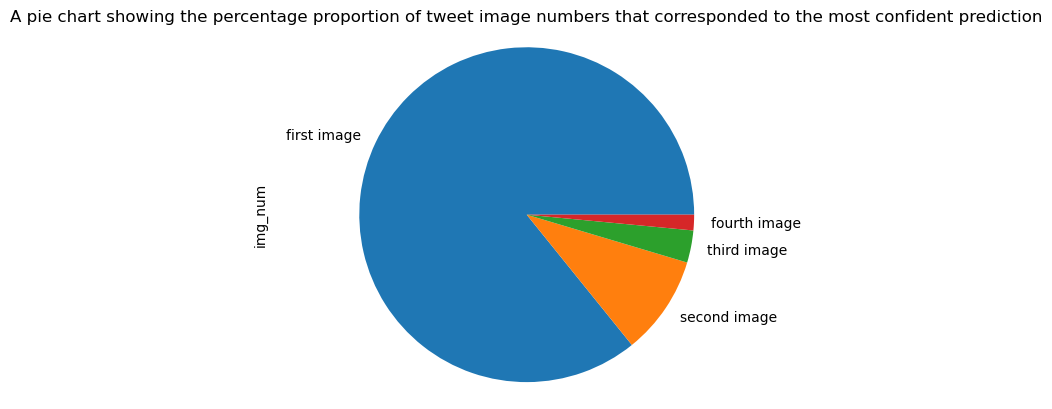

In [92]:
# creating a pie chart to display the percentage proportion of each categorical value in "img_num" column.
img_label = ['first image','second image','third image','fourth image']
master_dataframe['img_num'].value_counts().plot(kind='pie',labels = img_label )
plt.title('A pie chart showing the percentage proportion of tweet image numbers that corresponded to the most confident prediction')
plt.axis('equal')